In [4]:
from common.util import preprocess

text = 'You say goodbey and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
corpus

array([0, 1, 2, 3, 4, 1, 5, 6])

In [5]:
import numpy as np

def create_contexts_target(corpus, window_size = 1):
    target = corpus[window_size : -window_size]
    contexts = []

    for idx in range(window_size, len(corpus) - window_size):
        cs = []
        for t in range(-window_size, window_size + 1):
            if t == 0:
                continue
            cs.append(corpus[idx + t])
        contexts.append(cs)
    return np.array(contexts), np.array(target)


contexts, target = create_contexts_target(corpus)
contexts

array([[0, 2],
       [1, 3],
       [2, 4],
       [3, 1],
       [4, 5],
       [1, 6]])

In [6]:
# 将上下文和目标此转换为one-hot编码
from common.util import convert_one_hot

vocab_size = len(word_to_id)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

contexts

array([[[1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0]],

       [[0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0]],

       [[0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0]],

       [[0, 0, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0]],

       [[0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1]]])

In [13]:
from common.layers import MatMul, SoftmaxWithLoss

# 实现简单的CBOW
class SimpleCBOW:
    def __init__(self, vocab_size, hidden_size):
        # 初始化权重
        W_in = 0.01 * np.random.randn(vocab_size, hidden_size).astype('f')
        W_out = 0.01 * np.random.randn(hidden_size, vocab_size).astype('f')

        # 创建具体的层
        self.in_layer0 = MatMul(W_in)
        self.in_layer1 = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer = SoftmaxWithLoss()

        layers = [self.in_layer0, self.in_layer1, self.out_layer]
        self.params, self.grads = [], []

        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads

        self.word_vecs = W_in

    def forward(self, contexts, target):
        h0 = self.in_layer0.forward(contexts[:, 0])
        h1 = self.in_layer1.forward(contexts[:, 1])
        h = (h0 + h1) * 0.5
        score = self.out_layer.forward(h)
        loss = self.loss_layer.forward(score, target)
        return loss

    def backward(self, dout = 1):
         ds = self.loss_layer.backward(dout)
         da = self.out_layer.backward(ds)
         da *= 0.5
         self.in_layer0.backward(da)
         self.in_layer1.backward(da)
         return None

 epoch 601 |  iter 1 / 2 | time 0[s] | loss 0.43
| epoch 602 |  iter 1 / 2 | time 0[s] | loss 0.61
| epoch 603 |  iter 1 / 2 | time 0[s] | loss 0.47
| epoch 604 |  iter 1 / 2 | time 0[s] | loss 0.51
| epoch 605 |  iter 1 / 2 | time 0[s] | loss 0.53
| epoch 606 |  iter 1 / 2 | time 0[s] | loss 0.61
| epoch 607 |  iter 1 / 2 | time 0[s] | loss 0.47
| epoch 608 |  iter 1 / 2 | time 0[s] | loss 0.58
| epoch 609 |  iter 1 / 2 | time 0[s] | loss 0.55
| epoch 610 |  iter 1 / 2 | time 0[s] | loss 0.42
| epoch 611 |  iter 1 / 2 | time 0[s] | loss 0.55
| epoch 612 |  iter 1 / 2 | time 0[s] | loss 0.53
| epoch 613 |  iter 1 / 2 | time 0[s] | loss 0.52
| epoch 614 |  iter 1 / 2 | time 0[s] | loss 0.59
| epoch 615 |  iter 1 / 2 | time 0[s] | loss 0.35
| epoch 616 |  iter 1 / 2 | time 0[s] | loss 0.71
| epoch 617 |  iter 1 / 2 | time 0[s] | loss 0.53
| epoch 618 |  iter 1 / 2 | time 0[s] | loss 0.41
| epoch 619 |  iter 1 / 2 | time 0[s] | loss 0.52
| epoch 620 |  iter 1 / 2 | time 0[s] | loss 0.52
|

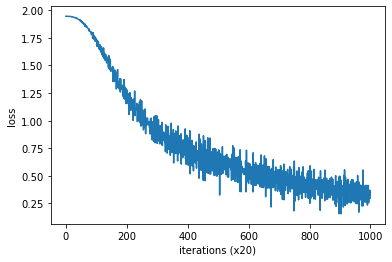

In [14]:
# 学习的实现
from common.optimizer import Adam
from common.trainer import Trainer

hidden_size = 5
max_epoch = 1000
batch_size = 3

model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)
trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

 epoch 601 |  iter 1 / 2 | time 1[s] | loss 2.19
| epoch 602 |  iter 1 / 2 | time 1[s] | loss 2.47
| epoch 603 |  iter 1 / 2 | time 1[s] | loss 2.04
| epoch 604 |  iter 1 / 2 | time 1[s] | loss 2.52
| epoch 605 |  iter 1 / 2 | time 1[s] | loss 2.30
| epoch 606 |  iter 1 / 2 | time 1[s] | loss 2.30
| epoch 607 |  iter 1 / 2 | time 1[s] | loss 2.30
| epoch 608 |  iter 1 / 2 | time 1[s] | loss 2.35
| epoch 609 |  iter 1 / 2 | time 1[s] | loss 2.09
| epoch 610 |  iter 1 / 2 | time 1[s] | loss 2.46
| epoch 611 |  iter 1 / 2 | time 1[s] | loss 2.52
| epoch 612 |  iter 1 / 2 | time 1[s] | loss 1.75
| epoch 613 |  iter 1 / 2 | time 1[s] | loss 2.85
| epoch 614 |  iter 1 / 2 | time 1[s] | loss 1.91
| epoch 615 |  iter 1 / 2 | time 1[s] | loss 2.52
| epoch 616 |  iter 1 / 2 | time 1[s] | loss 2.08
| epoch 617 |  iter 1 / 2 | time 1[s] | loss 2.68
| epoch 618 |  iter 1 / 2 | time 1[s] | loss 2.13
| epoch 619 |  iter 1 / 2 | time 1[s] | loss 2.08
| epoch 620 |  iter 1 / 2 | time 1[s] | loss 2.56
|

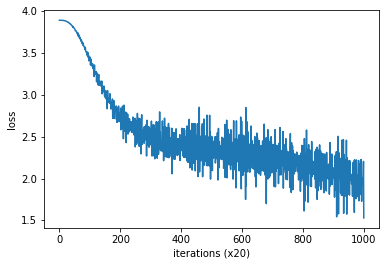

In [29]:
class SimpleSkipGram:
    def __init__(self, vocab_size, hidden_size):

        W_in = 0.01 * np.random.rand(vocab_size, hidden_size).astype('f')
        W_out = 0.01 * np.random.randn(hidden_size, vocab_size).astype('f')

        self.in_layer = MatMul(W_in) 
        self.out_layer = MatMul(W_out)
        self.loss_layer0 = SoftmaxWithLoss()
        self.loss_layer1 = SoftmaxWithLoss()

        layers = [self.in_layer, self.out_layer]

        self.params, self.grads = [], []

        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads

        self.word_vecs = self.in_layer

    def forward(self, contexts, target):
        h = self.in_layer.forward(target)
        s = self.out_layer.forward(h)
        l1 = self.loss_layer0.forward(s, contexts[:, 0])
        l2 = self.loss_layer1.forward(s, contexts[:, 1])
        loss = l1 + l2
        return loss

    def backward(self, dout = 1):
        ds0 = self.loss_layer0.backward(dout)
        ds1 = self.loss_layer1.backward(dout)
        ds = ds0 + ds1
        dh = self.out_layer.backward(ds)
        self.in_layer.backward(dh)
        return None

model2 = SimpleSkipGram(vocab_size, hidden_size)
optimizer2 = Adam()
trainer2 = Trainer(model2, optimizer2)
trainer2.fit(contexts, target, max_epoch, batch_size)
trainer2.plot()